# Feature Engineering

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [77]:
dataframe=pd.read_csv("CarData.csv")
dataframe.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [78]:
numerical_features=[feature for feature in dataframe.columns if dataframe[feature].dtype!="O"]
catergorical_features=[feature for feature in dataframe.columns  if dataframe[feature].dtype=="O"]
continues_feature=[feature for feature in  dataframe.columns if len(dataframe[feature].unique()) < 5 ]

### Coverting the Catgegorical feature in One Hot Encoding

The car name is cargerorical feature but we cant convert the can name in into hot encoding beacuse the carname have large length|
of the the unique values will use label encoding 

In [79]:
for feature in continues_feature:
    dummi_frame=pd.get_dummies(dataframe[feature],drop_first=True,prefix=True)
    dataframe=pd.concat([dataframe,dummi_frame],axis=1)
    

dataframe.drop(['Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],axis=1,inplace=True)
dataframe

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,True_Diesel,True_Petrol,True_Individual,True_Manual,True_1,True_3
0,ritz,2014,3.35,5.59,27000,0,1,0,1,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,1,0,0
2,ciaz,2017,7.25,9.85,6900,0,1,0,1,0,0
3,wagon r,2011,2.85,4.15,5200,0,1,0,1,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,0,1,0,0
297,brio,2015,4.00,5.90,60000,0,1,0,1,0,0
298,city,2009,3.35,11.00,87934,0,1,0,1,0,0
299,city,2017,11.50,12.50,9000,1,0,0,1,0,0


In [80]:
dataframe.shape

(301, 11)

#### Label Encoding 

In [81]:
car_label=dataframe.Car_Name.value_counts().to_dict()
dataframe.Car_Name=dataframe.Car_Name.map(car_label)
dataframe.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,True_Diesel,True_Petrol,True_Individual,True_Manual,True_1,True_3
0,4,2014,3.35,5.59,27000,0,1,0,1,0,0
1,6,2013,4.75,9.54,43000,1,0,0,1,0,0
2,9,2017,7.25,9.85,6900,0,1,0,1,0,0
3,4,2011,2.85,4.15,5200,0,1,0,1,0,0
4,5,2014,4.60,6.87,42450,1,0,0,1,0,0


### Handling the year feature

The year feature  eg 2014 Dont make nay senace we have to find the how old the car is eg 5 years

In [83]:
dataframe["current_year"]=2020
dataframe["Year"]=dataframe["current_year"]-dataframe["Year"]
dataframe.drop("current_year",axis=1,inplace=True)

Now the Data iss ready for the building the model

## Final Data Correlation

In [84]:
dataframe.corr()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,True_Diesel,True_Petrol,True_Individual,True_Manual,True_1,True_3
Car_Name,1.000000,0.009465,0.410533,0.407591,0.084953,0.171192,-0.163056,-0.536144,-0.015382,-0.110392,-0.054037
Year,0.009465,1.000000,0.236141,-0.047584,-0.524342,0.064315,-0.059959,-0.039896,0.000394,-0.104538,-0.152558
Selling_Price,0.410533,0.236141,1.000000,0.878983,0.029187,0.552339,-0.540571,-0.550724,-0.367128,-0.098318,-0.024591
Present_Price,0.407591,-0.047584,0.878983,1.000000,0.203647,0.473306,-0.465244,-0.512030,-0.348715,-0.092636,0.107723
Kms_Driven,0.084953,-0.524342,0.029187,0.203647,1.000000,0.172515,-0.172874,-0.101419,-0.162510,-0.027279,0.156231
True_Diesel,0.171192,0.064315,0.552339,0.473306,0.172515,1.000000,-0.979648,-0.350467,-0.098643,-0.046094,-0.028808
True_Petrol,-0.163056,-0.059959,-0.540571,-0.465244,-0.172874,-0.979648,1.000000,0.358321,0.091013,0.048579,0.029406
True_Individual,-0.536144,-0.039896,-0.550724,-0.512030,-0.101419,-0.350467,0.358321,1.000000,0.063240,0.096188,0.078308
True_Manual,-0.015382,0.000394,-0.367128,-0.348715,-0.162510,-0.098643,0.091013,0.063240,1.000000,0.072571,-0.147479
True_1,-0.110392,-0.104538,-0.098318,-0.092636,-0.027279,-0.046094,0.048579,0.096188,0.072571,1.000000,-0.010703


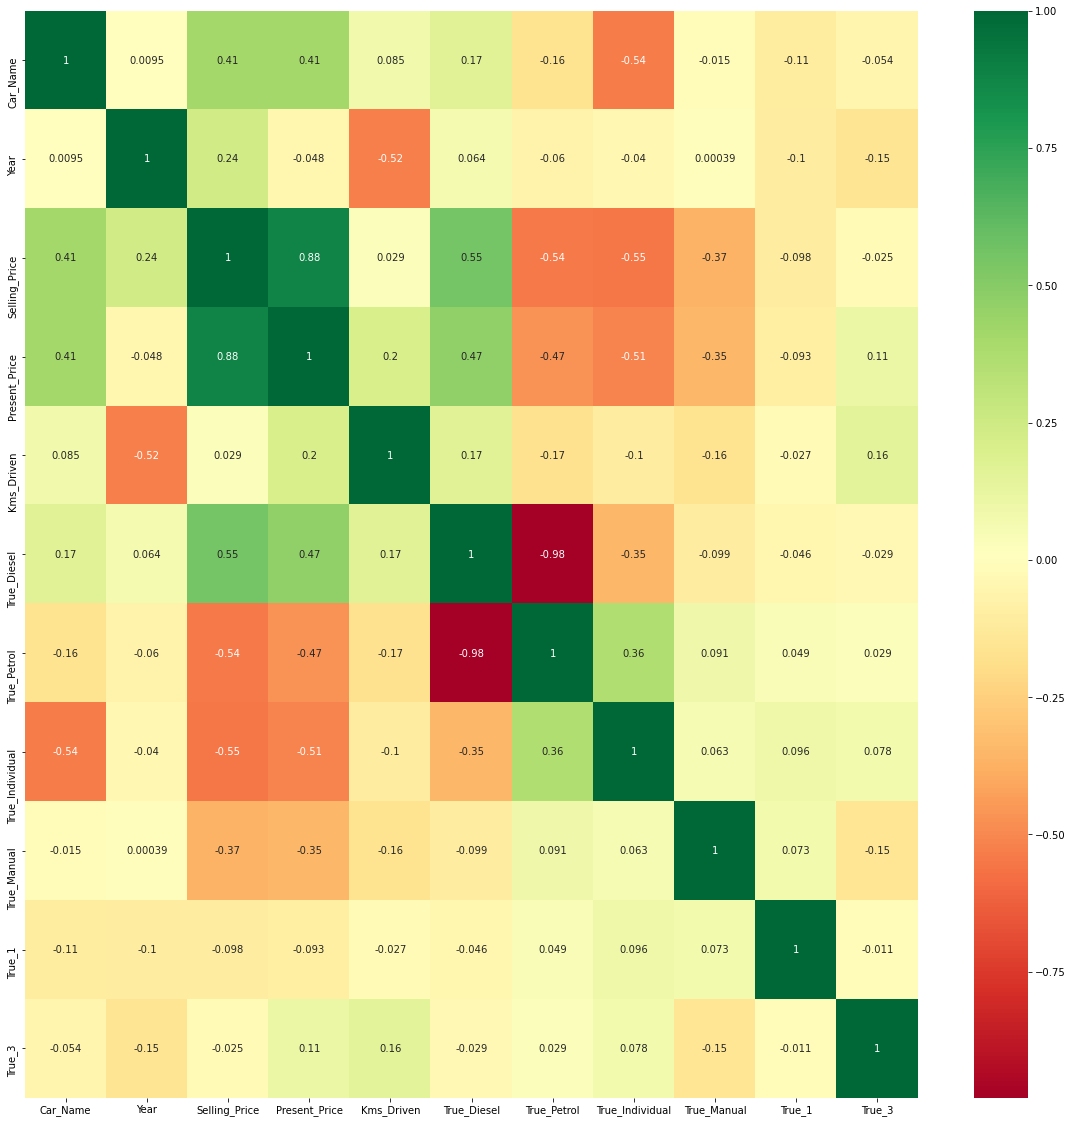

In [91]:
corrmat=dataframe.corr()
top_corr_feature=corrmat.index
plt.figure(figsize=(20,20))
sns.heatmap(dataframe[top_corr_feature].corr(),annot=True,cmap="RdYlGn")

## Saving the final data

In [96]:
dataframe.to_csv("Final Data.csv",index=False)